In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.chdir('D:\ML\class\KNN algo')

In [3]:
os.listdir()

['Mobile_data.csv']

In [4]:
mob=pd.read_csv('Mobile_data.csv')

In [5]:
mob.shape

(2000, 15)

In [6]:
mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### EDA

### Catagorical

In [8]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")
    
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[0, 1]
Value count and % : 
   Count Percentage
0   1010     50.5 %
1    990     49.5 %


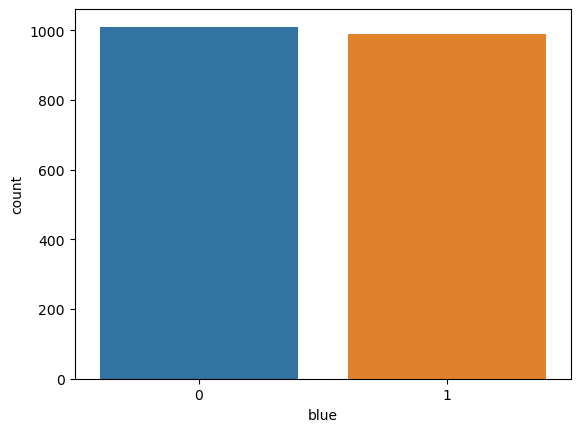

In [9]:
univariate_cat(mob,'blue')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[0, 1]
Value count and % : 
   Count Percentage
1   1019    50.95 %
0    981    49.05 %


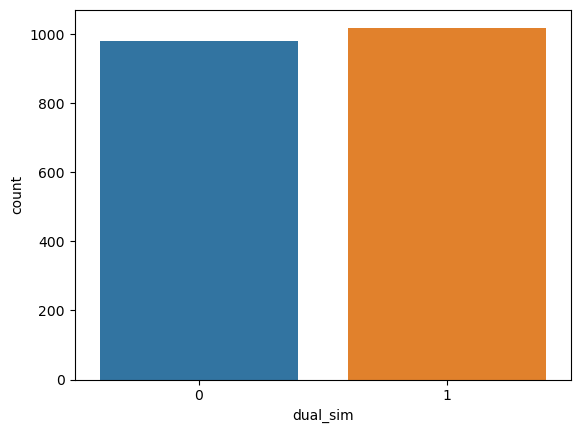

In [10]:
univariate_cat(mob,'dual_sim')

Total missing values : 0

Total count of unique category : 20

Unique categories : 
[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8, 9, 10, 18, 17, 14, 19]
Value count and % : 
    Count Percentage
0     474     23.7 %
1     245    12.25 %
2     189     9.45 %
3     170      8.5 %
5     139     6.95 %
4     133     6.65 %
6     112      5.6 %
7     100      5.0 %
9      78      3.9 %
8      77     3.85 %
10     62      3.1 %
11     51     2.55 %
12     45     2.25 %
13     40      2.0 %
16     24      1.2 %
15     23     1.15 %
14     20      1.0 %
18     11     0.55 %
17      6      0.3 %
19      1     0.05 %


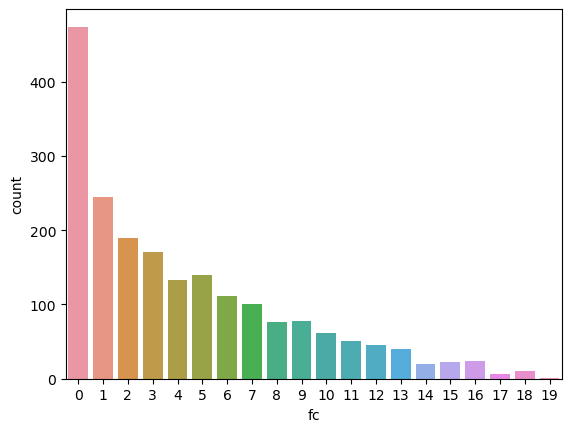

In [11]:
univariate_cat(mob,'fc')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[0, 1]
Value count and % : 
   Count Percentage
1   1043    52.15 %
0    957    47.85 %


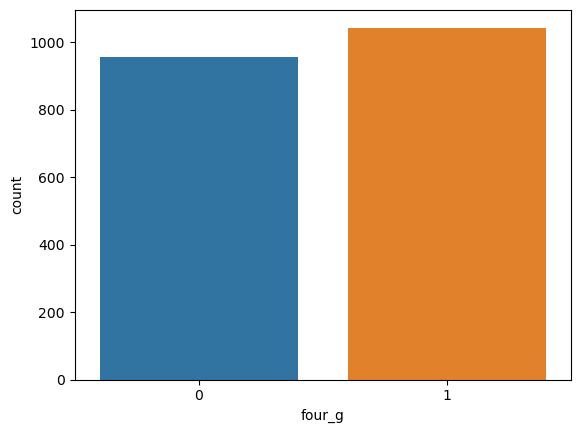

In [12]:
univariate_cat(mob,'four_g')

Total missing values : 0

Total count of unique category : 8

Unique categories : 
[2, 3, 5, 6, 1, 8, 4, 7]
Value count and % : 
   Count Percentage
4    274     13.7 %
7    259    12.95 %
8    256     12.8 %
2    247    12.35 %
3    246     12.3 %
5    246     12.3 %
1    242     12.1 %
6    230     11.5 %


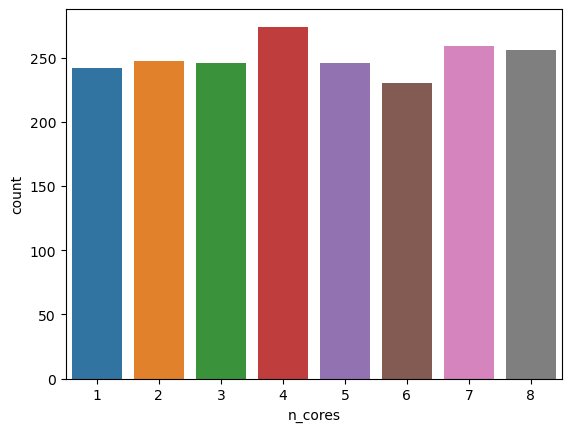

In [13]:
univariate_cat(mob,'n_cores')

Total missing values : 0

Total count of unique category : 21

Unique categories : 
[2, 6, 9, 14, 7, 10, 0, 15, 1, 18, 17, 11, 16, 4, 20, 13, 3, 19, 8, 5, 12]
Value count and % : 
    Count Percentage
10    122      6.1 %
7     119     5.95 %
9     112      5.6 %
20    110      5.5 %
1     104      5.2 %
14    104      5.2 %
0     101     5.05 %
2      99     4.95 %
17     99     4.95 %
6      95     4.75 %
4      95     4.75 %
3      93     4.65 %
15     92      4.6 %
12     90      4.5 %
8      89     4.45 %
16     88      4.4 %
13     85     4.25 %
19     83     4.15 %
18     82      4.1 %
11     79     3.95 %
5      59     2.95 %


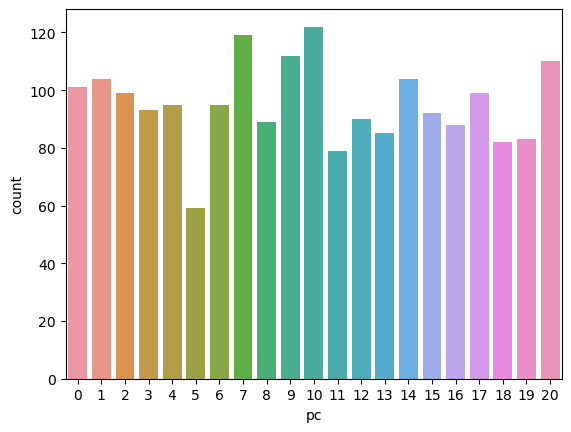

In [14]:
univariate_cat(mob,'pc')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[0, 1]
Value count and % : 
   Count Percentage
1   1523    76.15 %
0    477    23.85 %


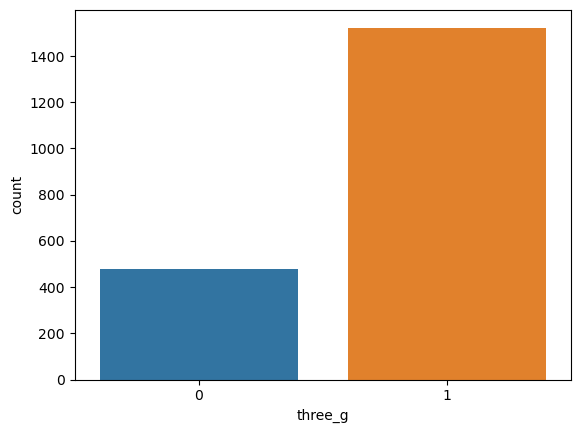

In [15]:
univariate_cat(mob,'three_g')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[0, 1]
Value count and % : 
   Count Percentage
1   1006     50.3 %
0    994     49.7 %


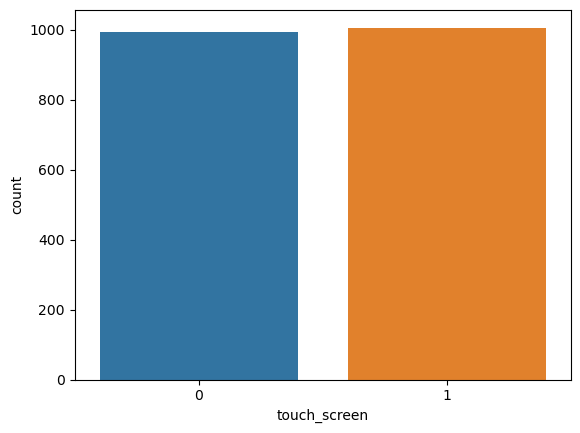

In [16]:
univariate_cat(mob,'touch_screen')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[1, 0]
Value count and % : 
   Count Percentage
1   1014     50.7 %
0    986     49.3 %


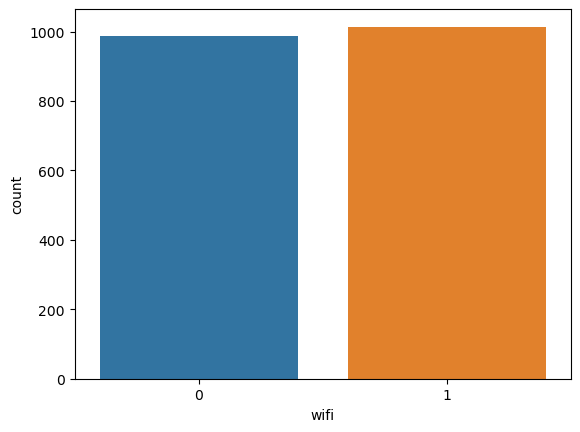

In [17]:
univariate_cat(mob,'wifi')

Total missing values : 0

Total count of unique category : 4

Unique categories : 
[1, 2, 3, 0]
Value count and % : 
   Count Percentage
1    500     25.0 %
2    500     25.0 %
3    500     25.0 %
0    500     25.0 %


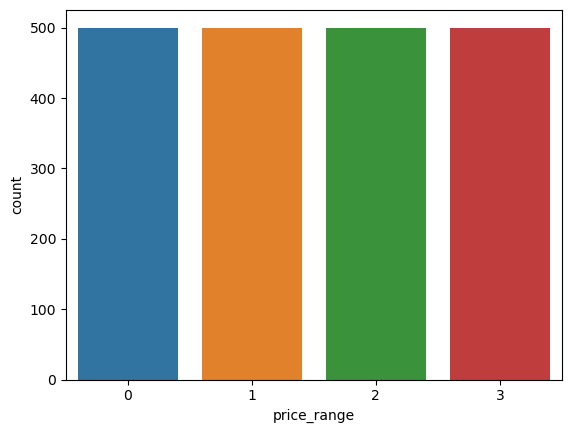

In [18]:
univariate_cat(mob,'price_range')

In [19]:
mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Numerical

In [20]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    unique_cnt=data[x].nunique()
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std, "unique_cnt": unique_cnt, 
             "range" : range1, "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

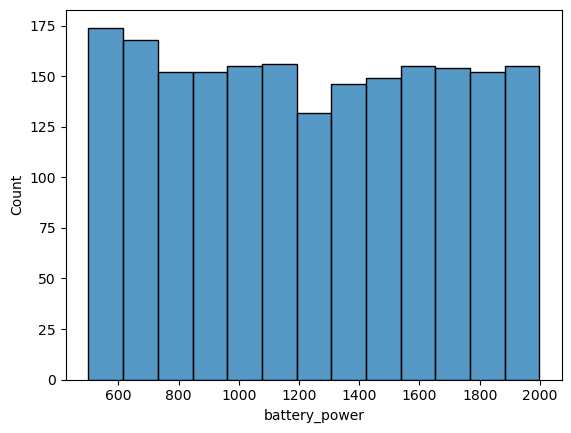

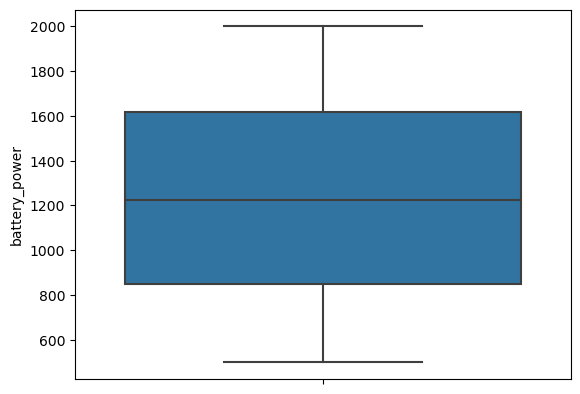

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'unique_cnt': 1094,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'Kurtosis': -1.22}

In [21]:
univariate_num(mob,'battery_power')

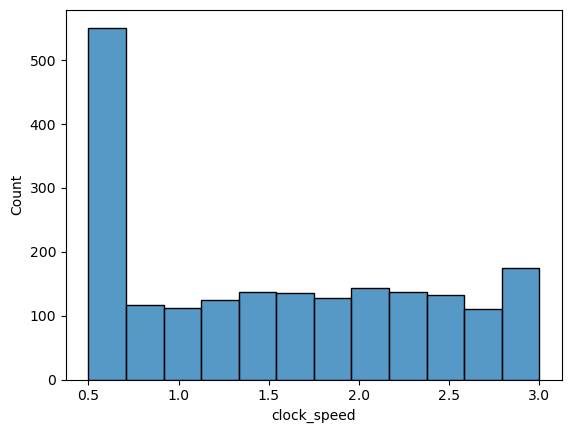

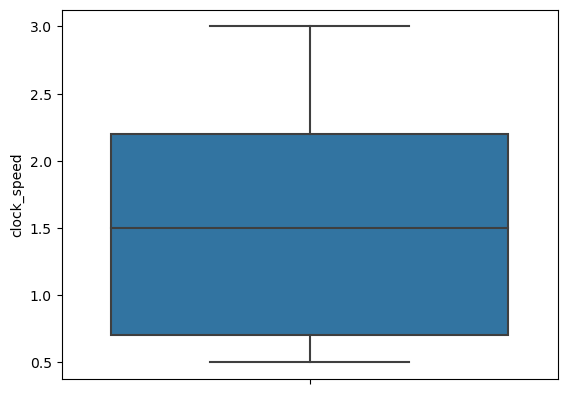

{'missing': 0,
 'min': 0.5,
 'max': 3.0,
 'mean': 1.52,
 'var': 0.67,
 'std': 0.82,
 'unique_cnt': 26,
 'range': 2.5,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.2,
 'skewness': 0.18,
 'Kurtosis': -1.32}

In [22]:
univariate_num(mob,'clock_speed')

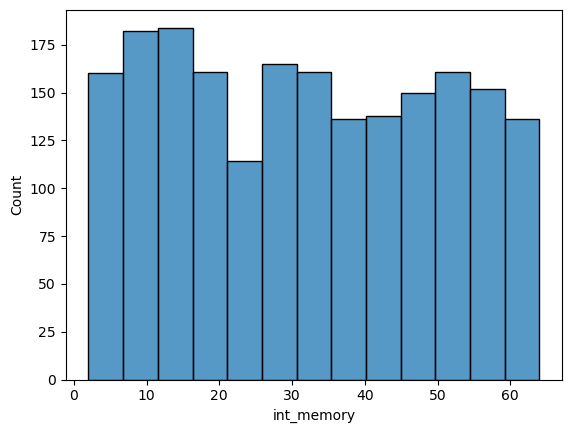

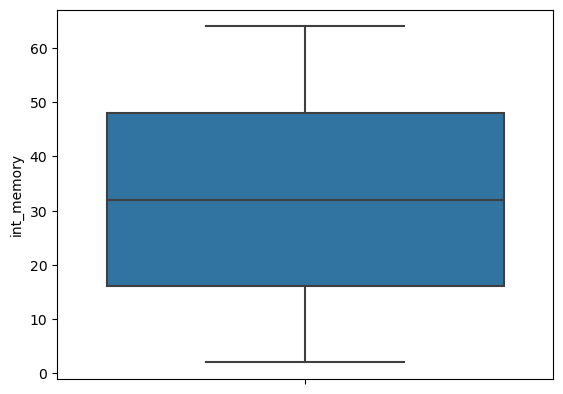

{'missing': 0,
 'min': 2,
 'max': 64,
 'mean': 32.05,
 'var': 329.27,
 'std': 18.15,
 'unique_cnt': 63,
 'range': 62,
 'q1': 16.0,
 'q2': 32.0,
 'q3': 48.0,
 'skewness': 0.06,
 'Kurtosis': -1.22}

In [23]:
univariate_num(mob,'int_memory')

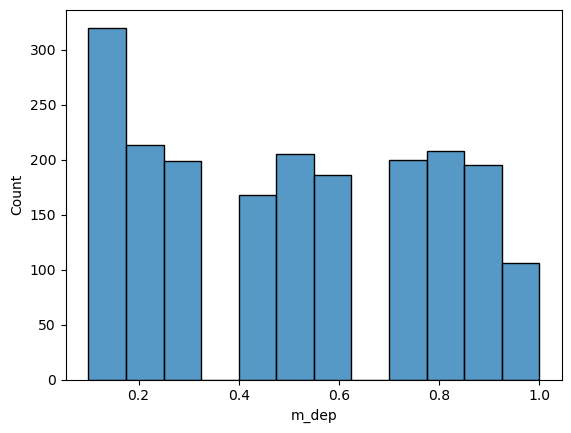

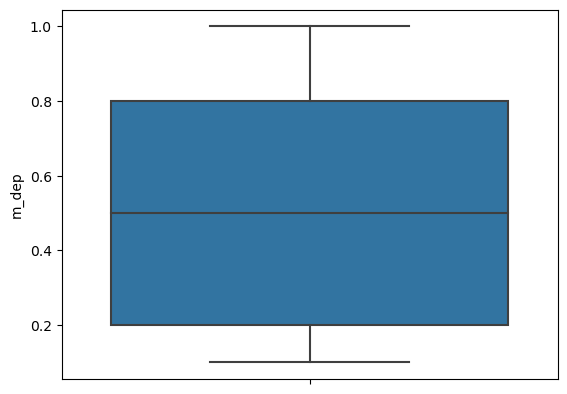

{'missing': 0,
 'min': 0.1,
 'max': 1.0,
 'mean': 0.5,
 'var': 0.08,
 'std': 0.29,
 'unique_cnt': 10,
 'range': 0.9,
 'q1': 0.2,
 'q2': 0.5,
 'q3': 0.8,
 'skewness': 0.09,
 'Kurtosis': -1.27}

In [24]:
univariate_num(mob,'m_dep')

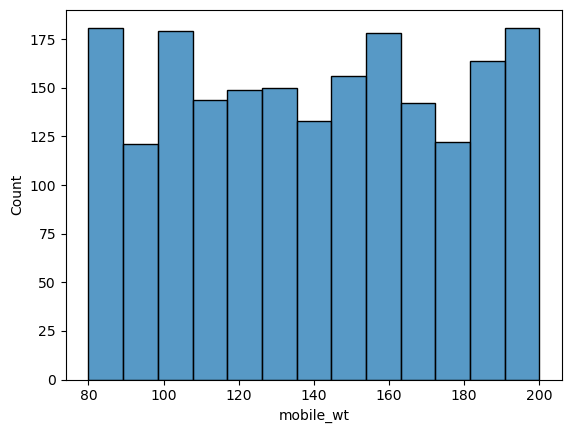

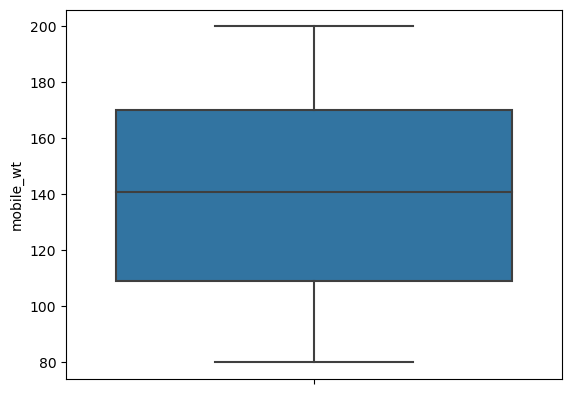

{'missing': 0,
 'min': 80,
 'max': 200,
 'mean': 140.25,
 'var': 1253.14,
 'std': 35.4,
 'unique_cnt': 121,
 'range': 120,
 'q1': 109.0,
 'q2': 141.0,
 'q3': 170.0,
 'skewness': 0.01,
 'Kurtosis': -1.21}

In [25]:
univariate_num(mob,'mobile_wt')

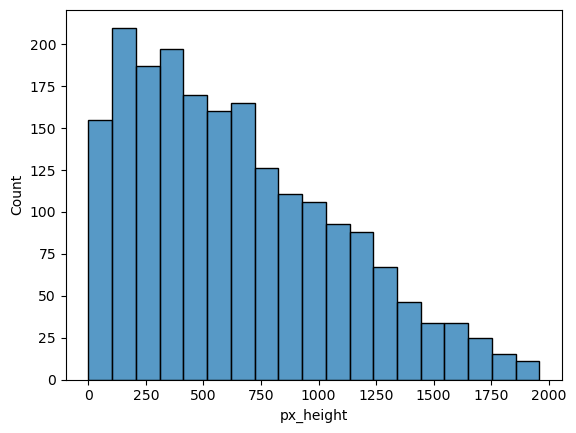

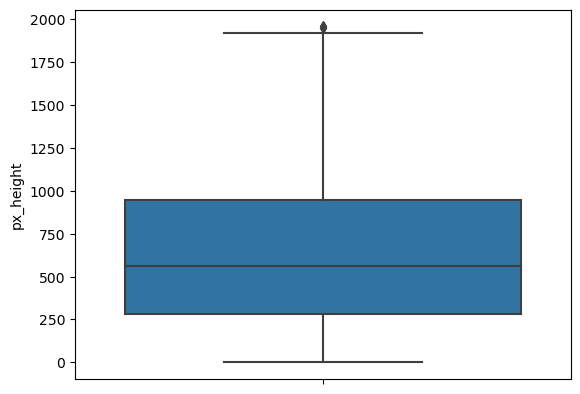

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'unique_cnt': 1137,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'Kurtosis': -0.32}

In [26]:
univariate_num(mob,'px_height')

* Pixel Height can not be 0. So I will drop all the data where pixel height is 0.

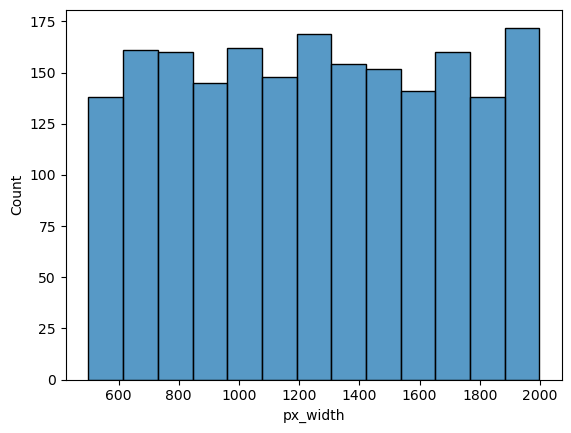

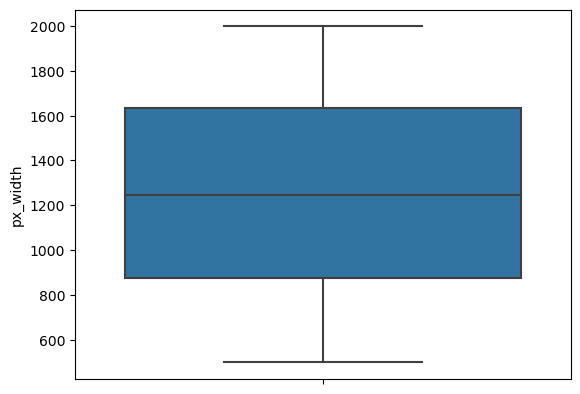

{'missing': 0,
 'min': 500,
 'max': 1998,
 'mean': 1251.52,
 'var': 186796.36,
 'std': 432.2,
 'unique_cnt': 1109,
 'range': 1498,
 'q1': 874.75,
 'q2': 1247.0,
 'q3': 1633.0,
 'skewness': 0.01,
 'Kurtosis': -1.19}

In [27]:
univariate_num(mob,'px_width')


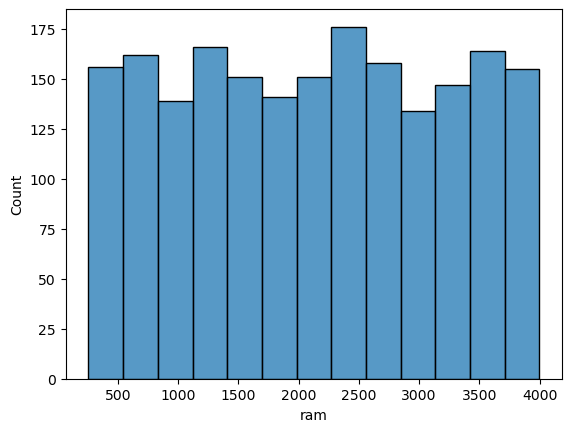

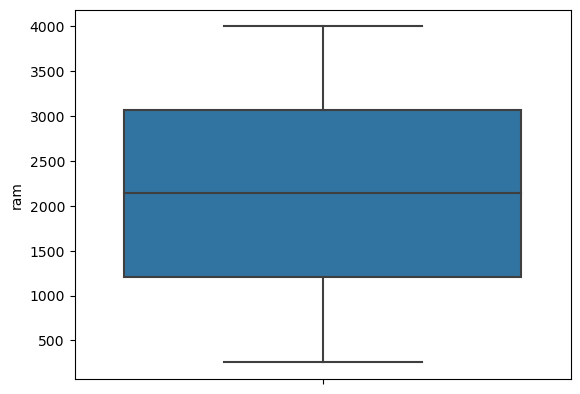

{'missing': 0,
 'min': 256,
 'max': 3998,
 'mean': 2124.21,
 'var': 1176643.61,
 'std': 1084.73,
 'unique_cnt': 1562,
 'range': 3742,
 'q1': 1207.5,
 'q2': 2146.5,
 'q3': 3064.5,
 'skewness': 0.01,
 'Kurtosis': -1.19}

In [28]:
univariate_num(mob,'ram')

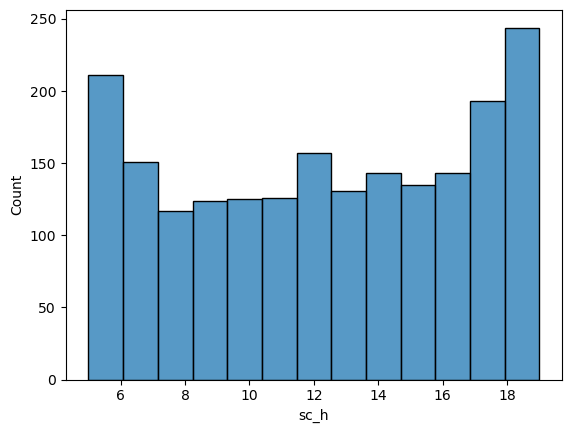

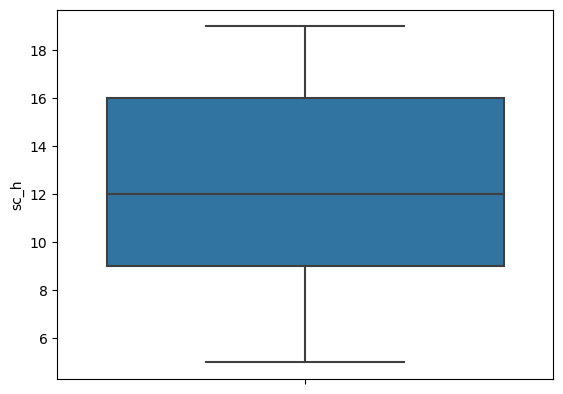

{'missing': 0,
 'min': 5,
 'max': 19,
 'mean': 12.31,
 'var': 17.75,
 'std': 4.21,
 'unique_cnt': 15,
 'range': 14,
 'q1': 9.0,
 'q2': 12.0,
 'q3': 16.0,
 'skewness': -0.1,
 'Kurtosis': -1.19}

In [29]:
univariate_num(mob,'sc_h')

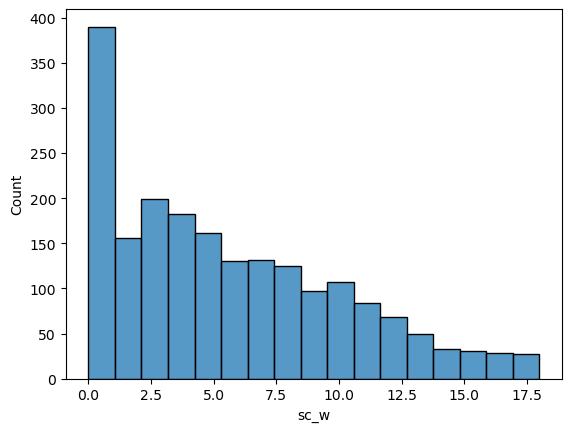

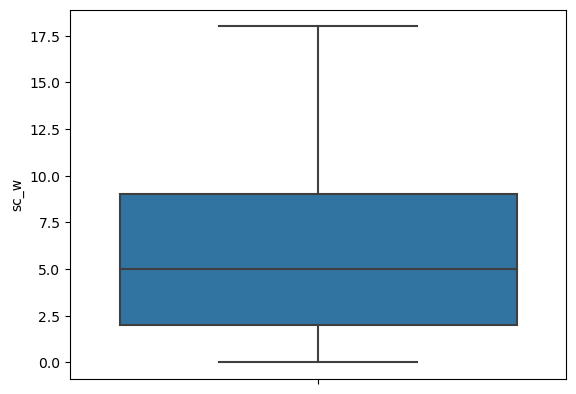

{'missing': 0,
 'min': 0,
 'max': 18,
 'mean': 5.77,
 'var': 18.98,
 'std': 4.36,
 'unique_cnt': 19,
 'range': 18,
 'q1': 2.0,
 'q2': 5.0,
 'q3': 9.0,
 'skewness': 0.63,
 'Kurtosis': -0.39}

In [30]:
univariate_num(mob,'sc_w')

* Screen Width can not be 0. So I will drop all the data where screen width is 0.

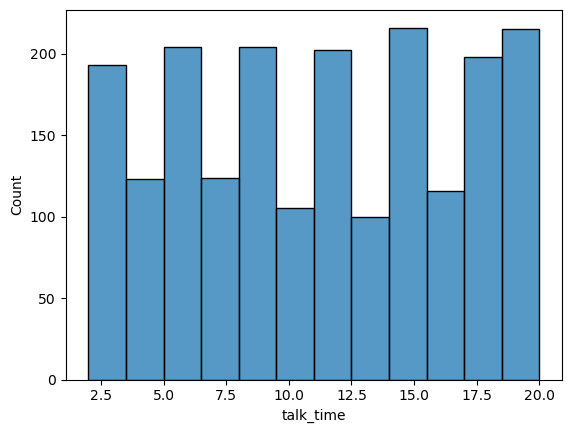

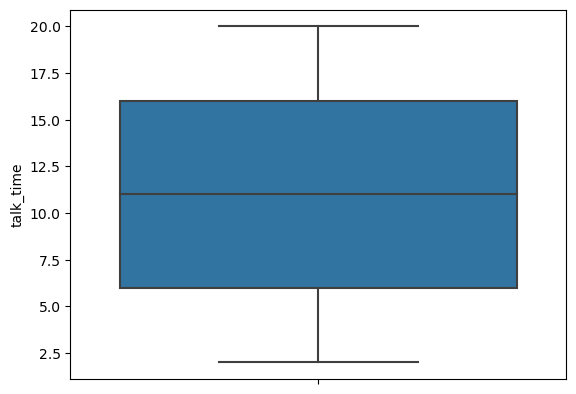

{'missing': 0,
 'min': 2,
 'max': 20,
 'mean': 11.01,
 'var': 29.85,
 'std': 5.46,
 'unique_cnt': 19,
 'range': 18,
 'q1': 6.0,
 'q2': 11.0,
 'q3': 16.0,
 'skewness': 0.01,
 'Kurtosis': -1.22}

In [31]:
univariate_num(mob,'talk_time')

### Bivariate

In [32]:
mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

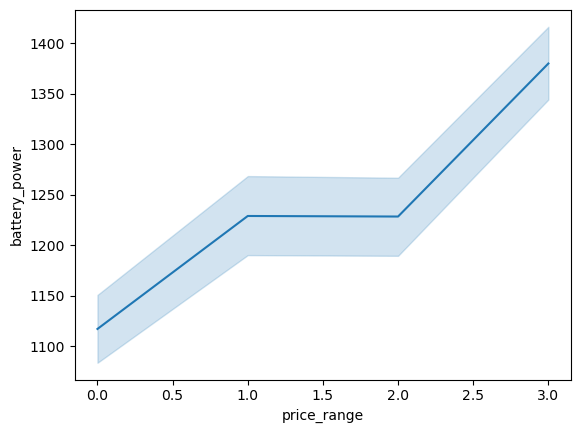

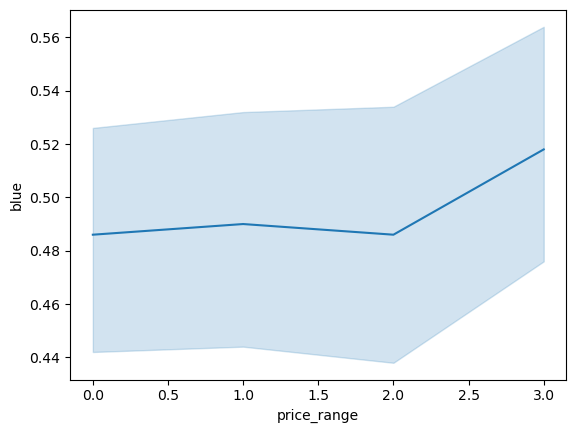

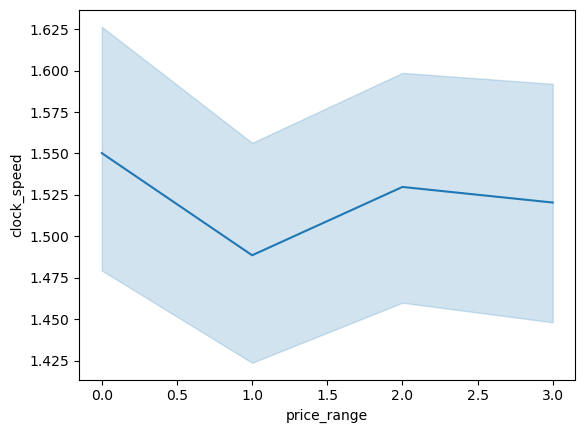

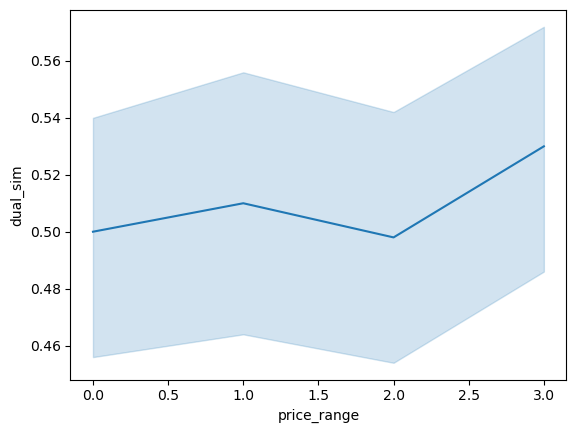

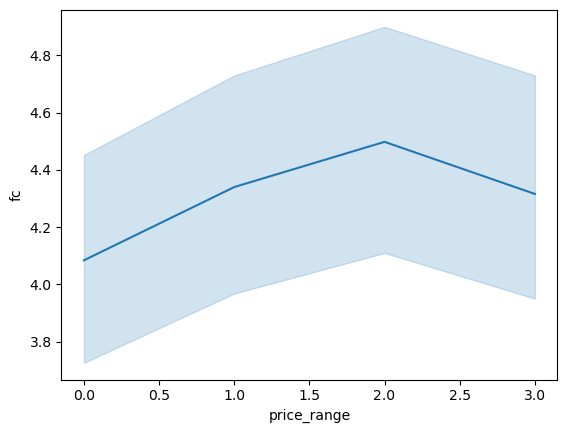

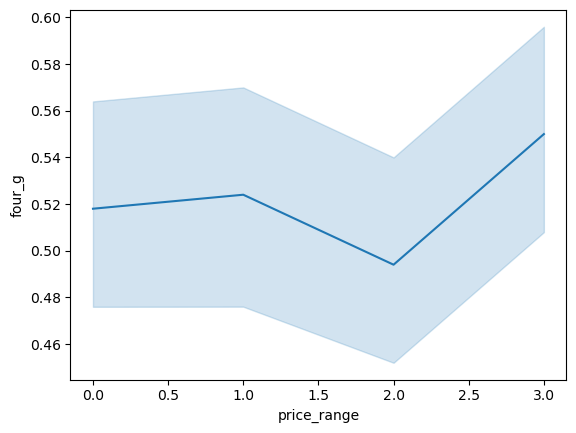

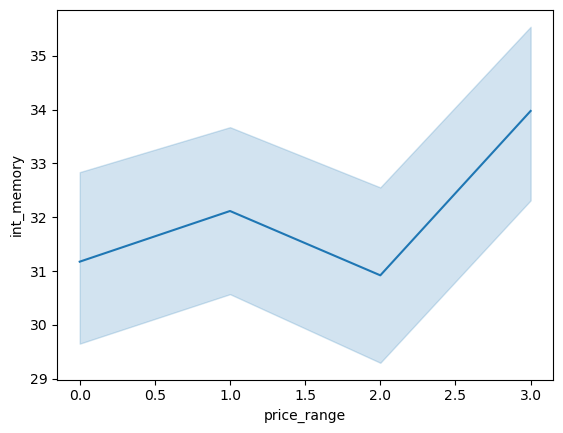

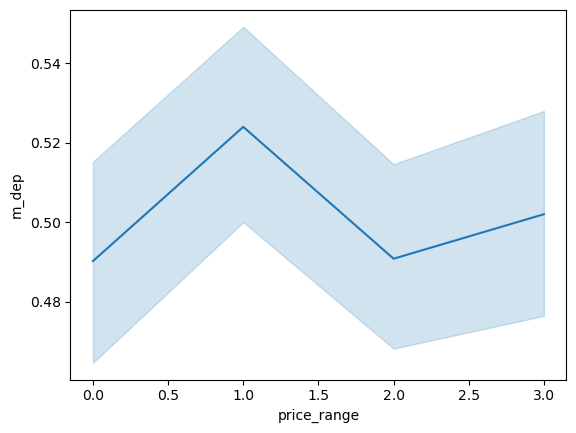

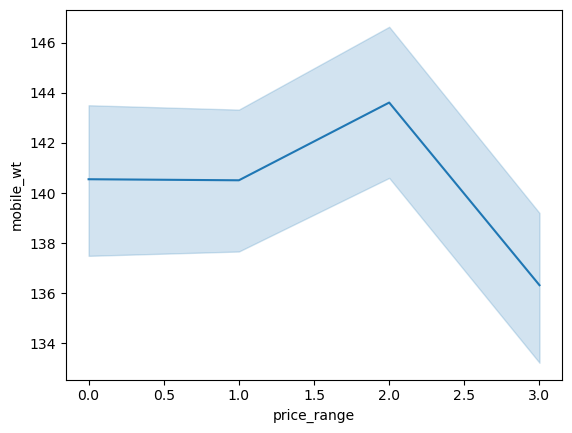

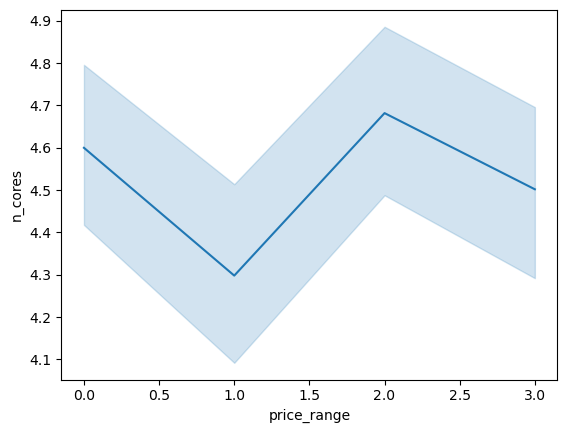

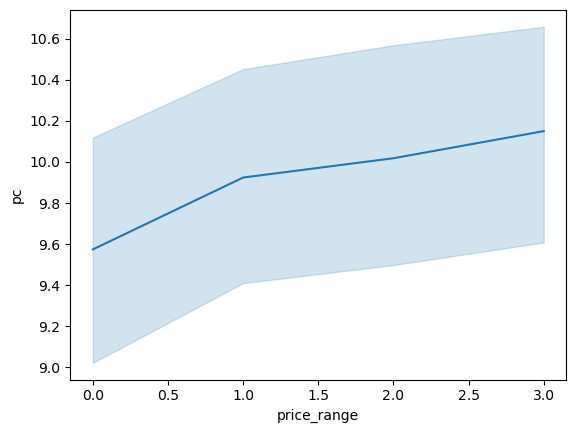

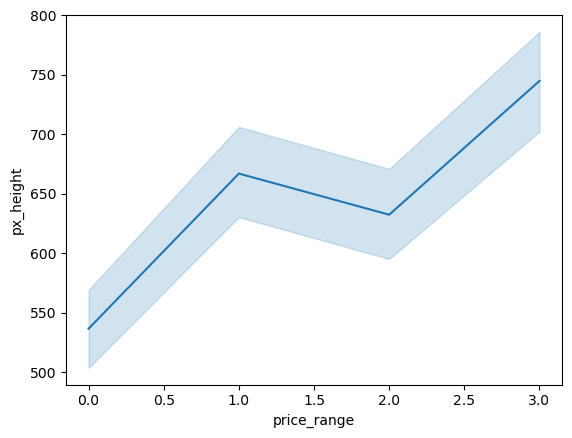

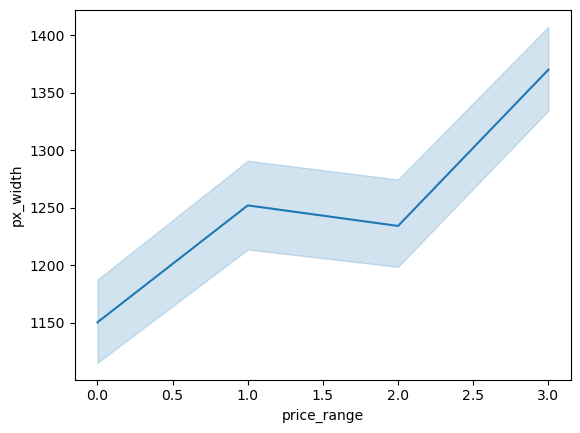

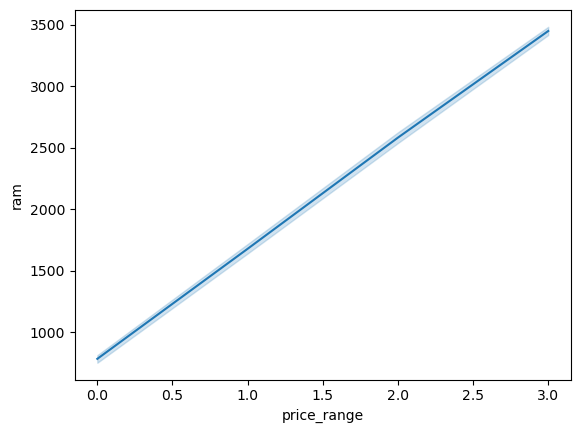

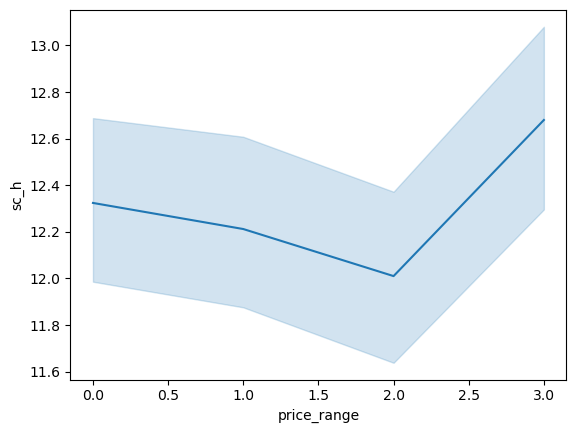

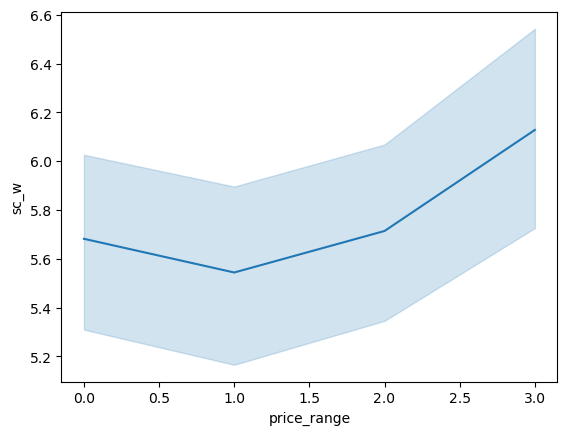

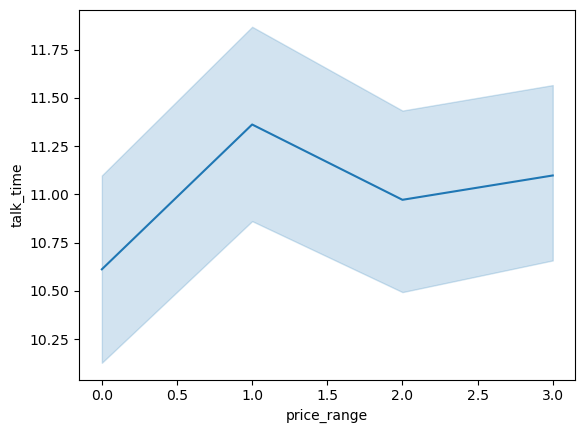

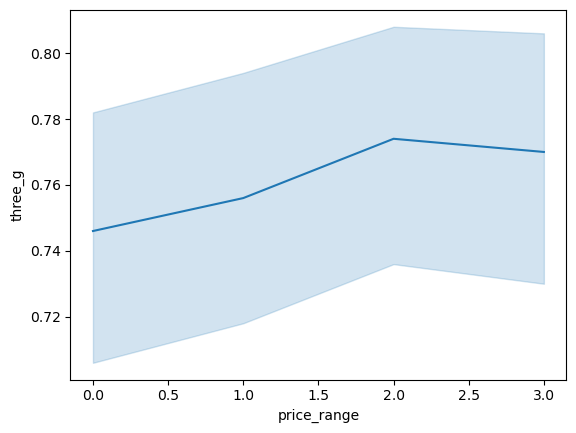

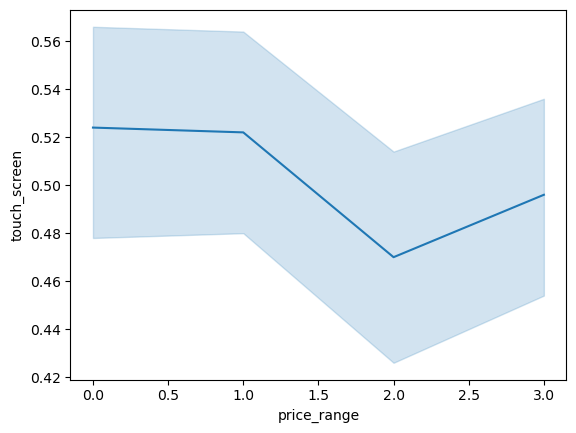

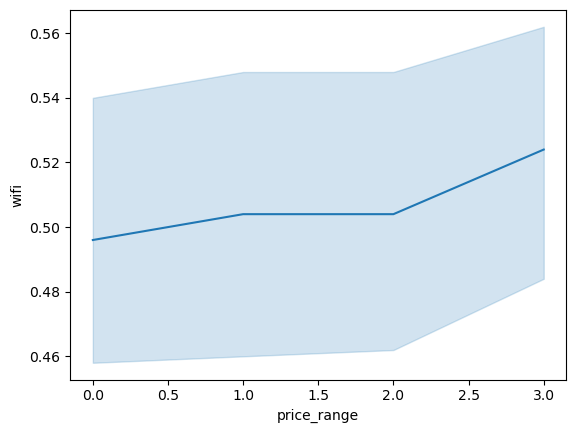

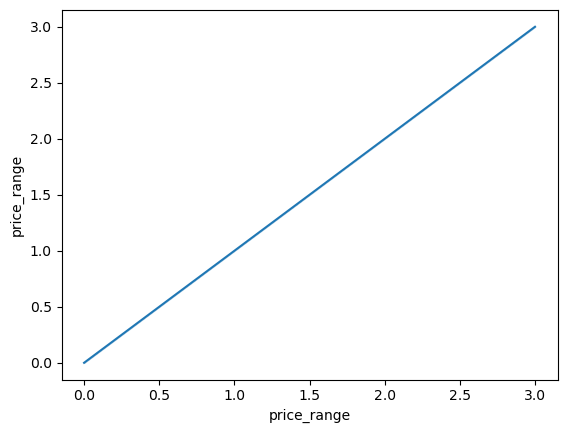

In [33]:
for i in mob.columns:
    sns.lineplot(data=mob, x='price_range', y=i)
    plt.show()

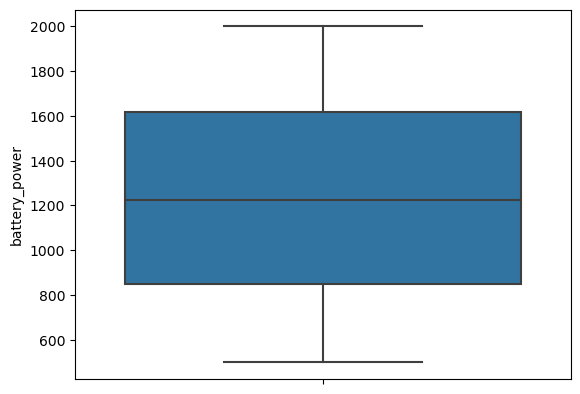

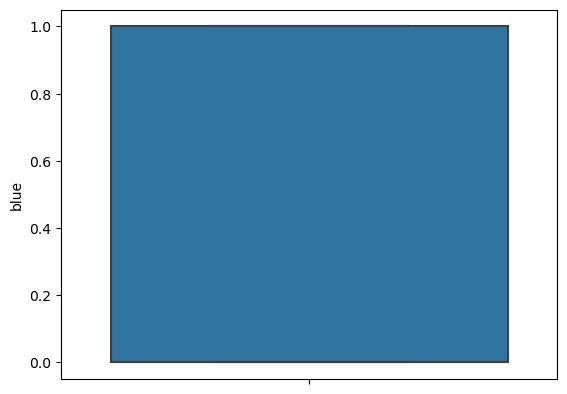

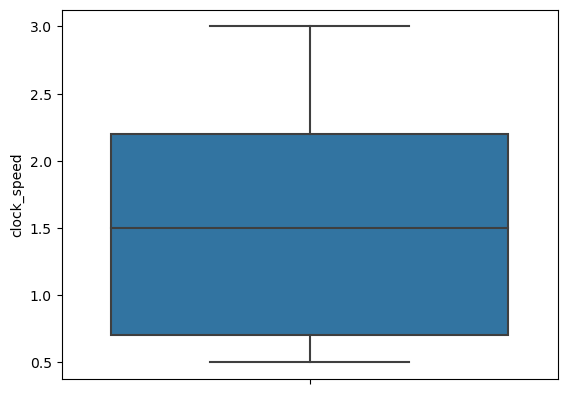

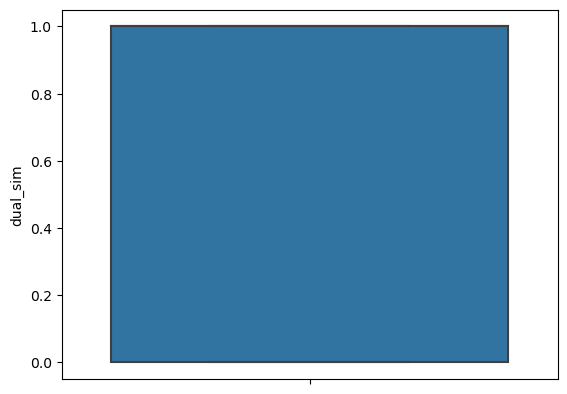

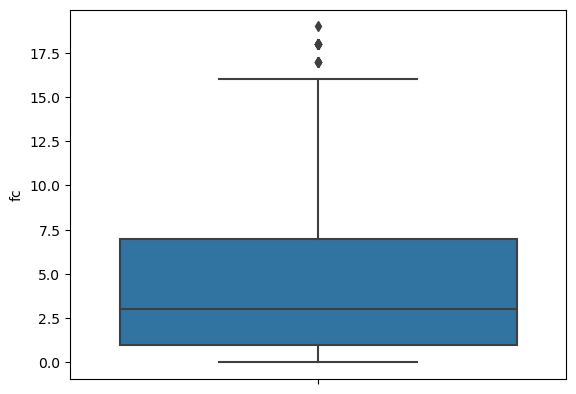

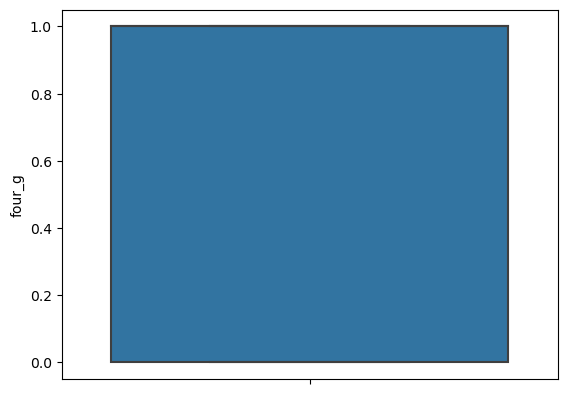

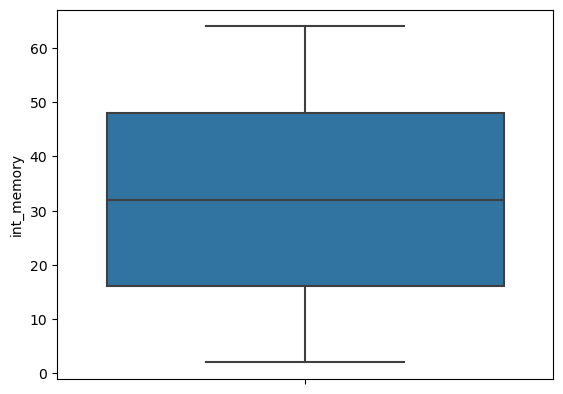

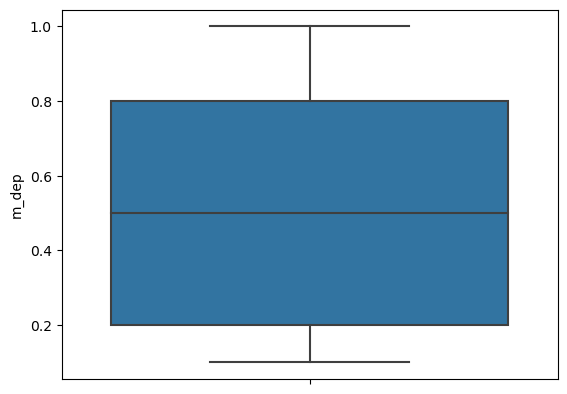

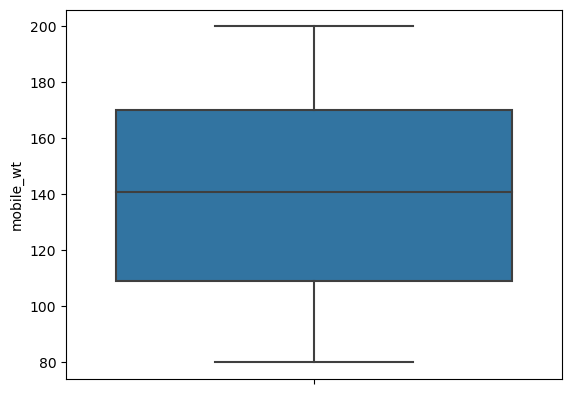

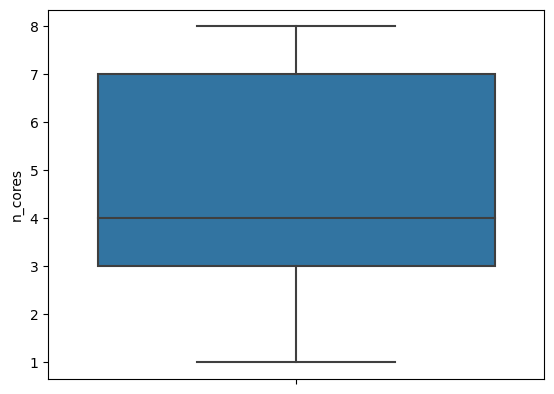

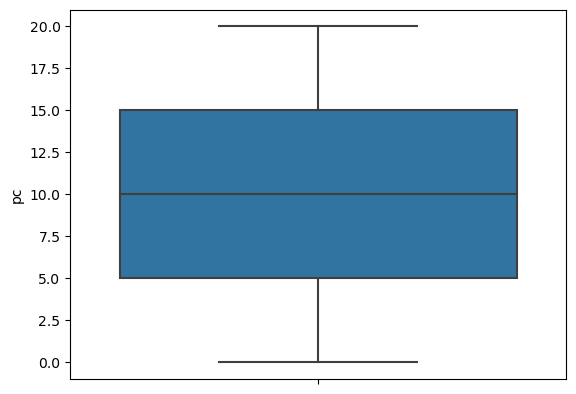

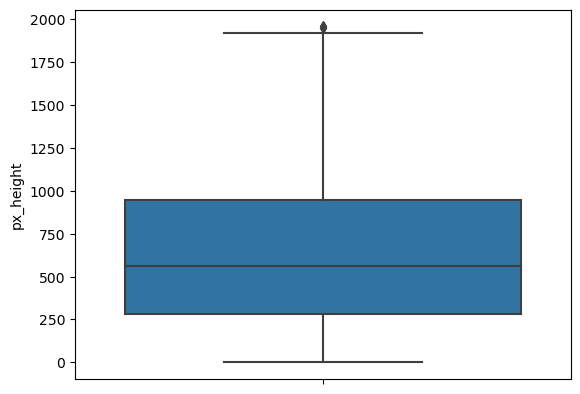

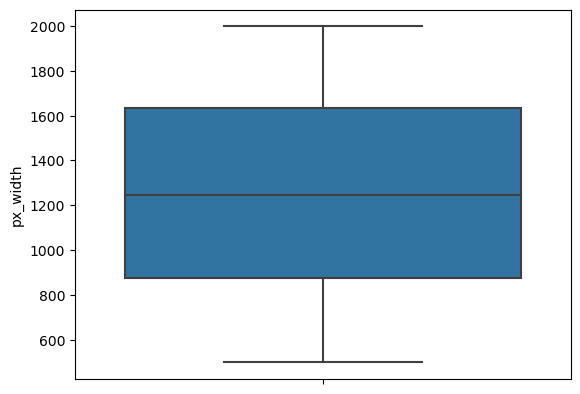

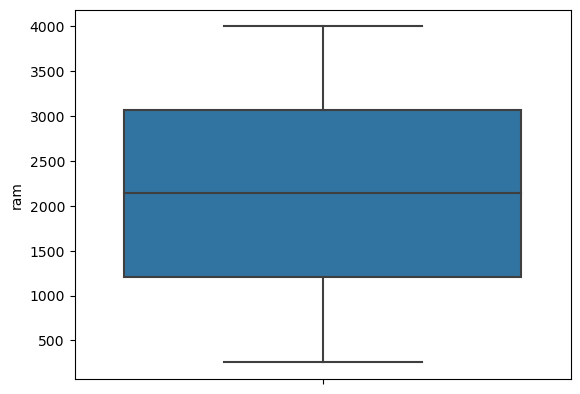

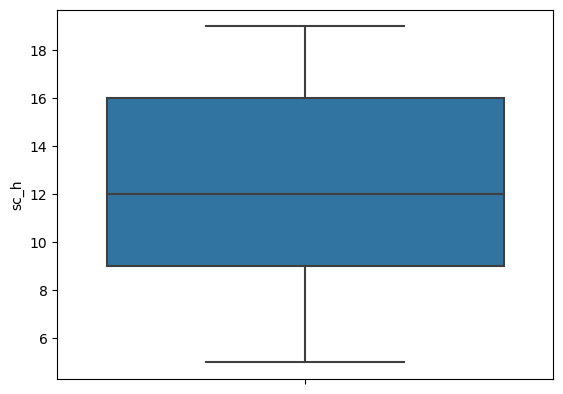

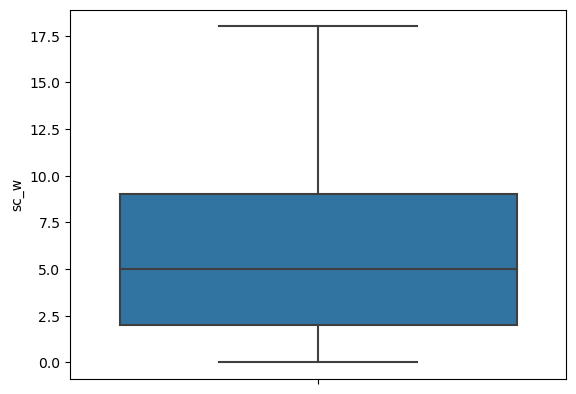

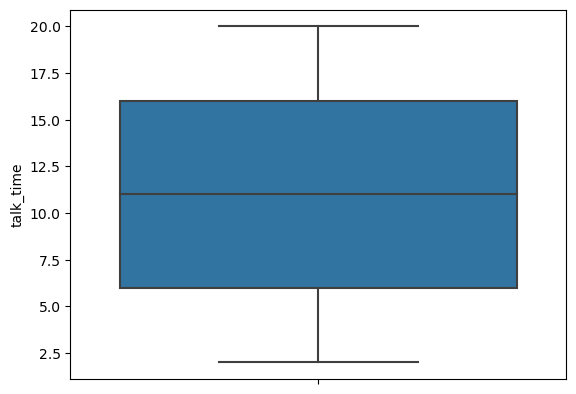

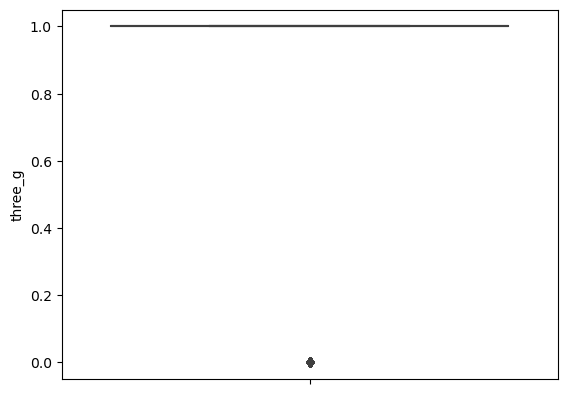

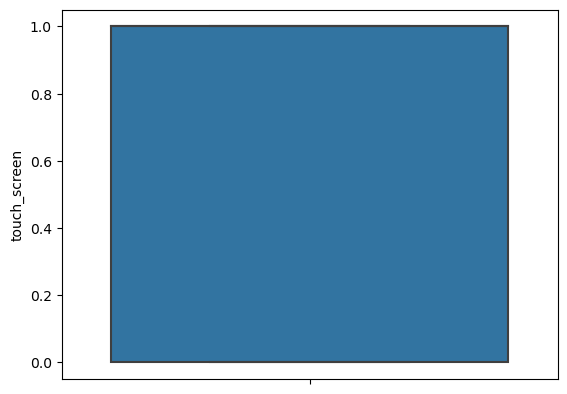

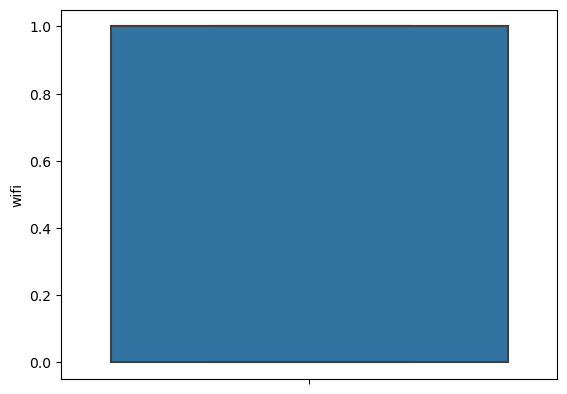

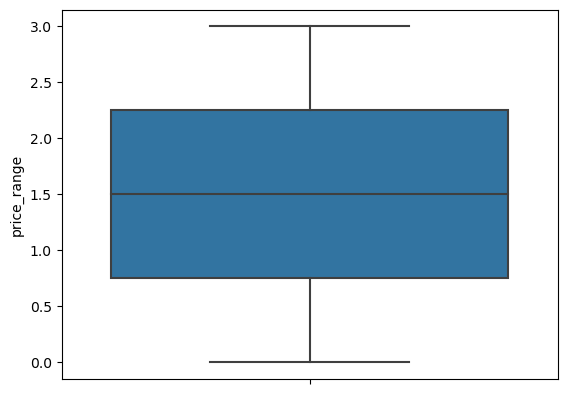

In [34]:
for i in mob.columns:
    sns.boxplot(data=mob, y=i)
    plt.show()

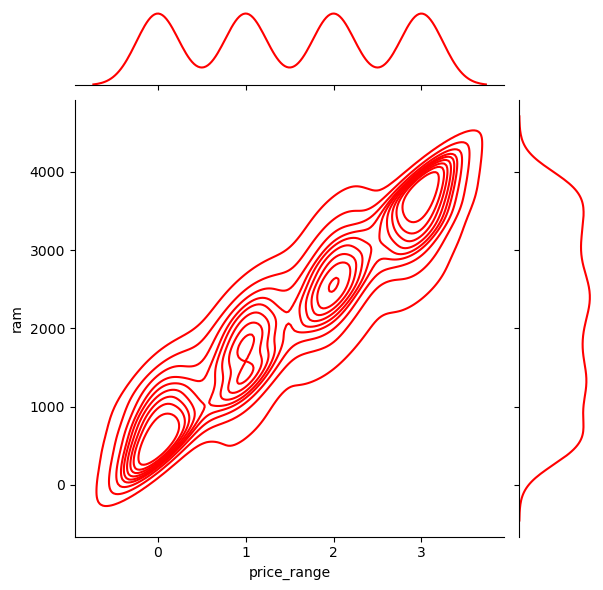

In [35]:
sns.jointplot(data=mob, x='price_range', y='ram', color='red', kind='kde')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

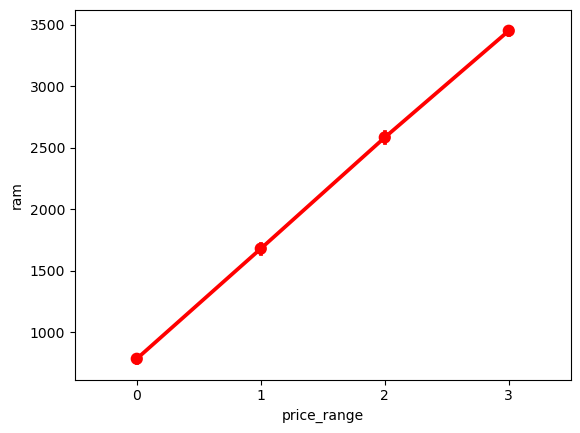

In [36]:
sns.pointplot(data=mob, x='price_range', y='ram', color='red')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

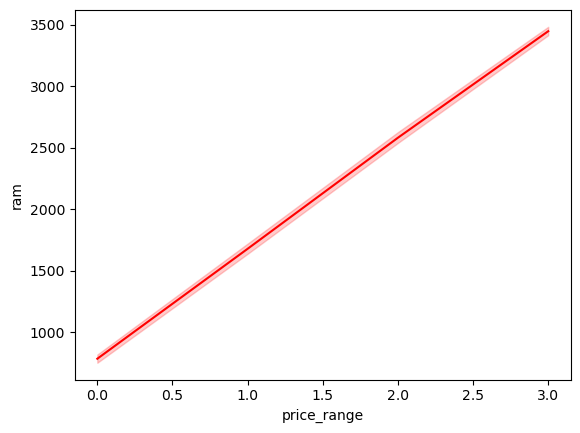

In [37]:
sns.lineplot(data=mob, x='price_range', y='ram', color='red')

* Price Range has direct relation with RAM. With increase in RAM the price is increasing.

### Missing Value Treatment

In [38]:
mob.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* There is no missing value in this dataset.

### Outliers

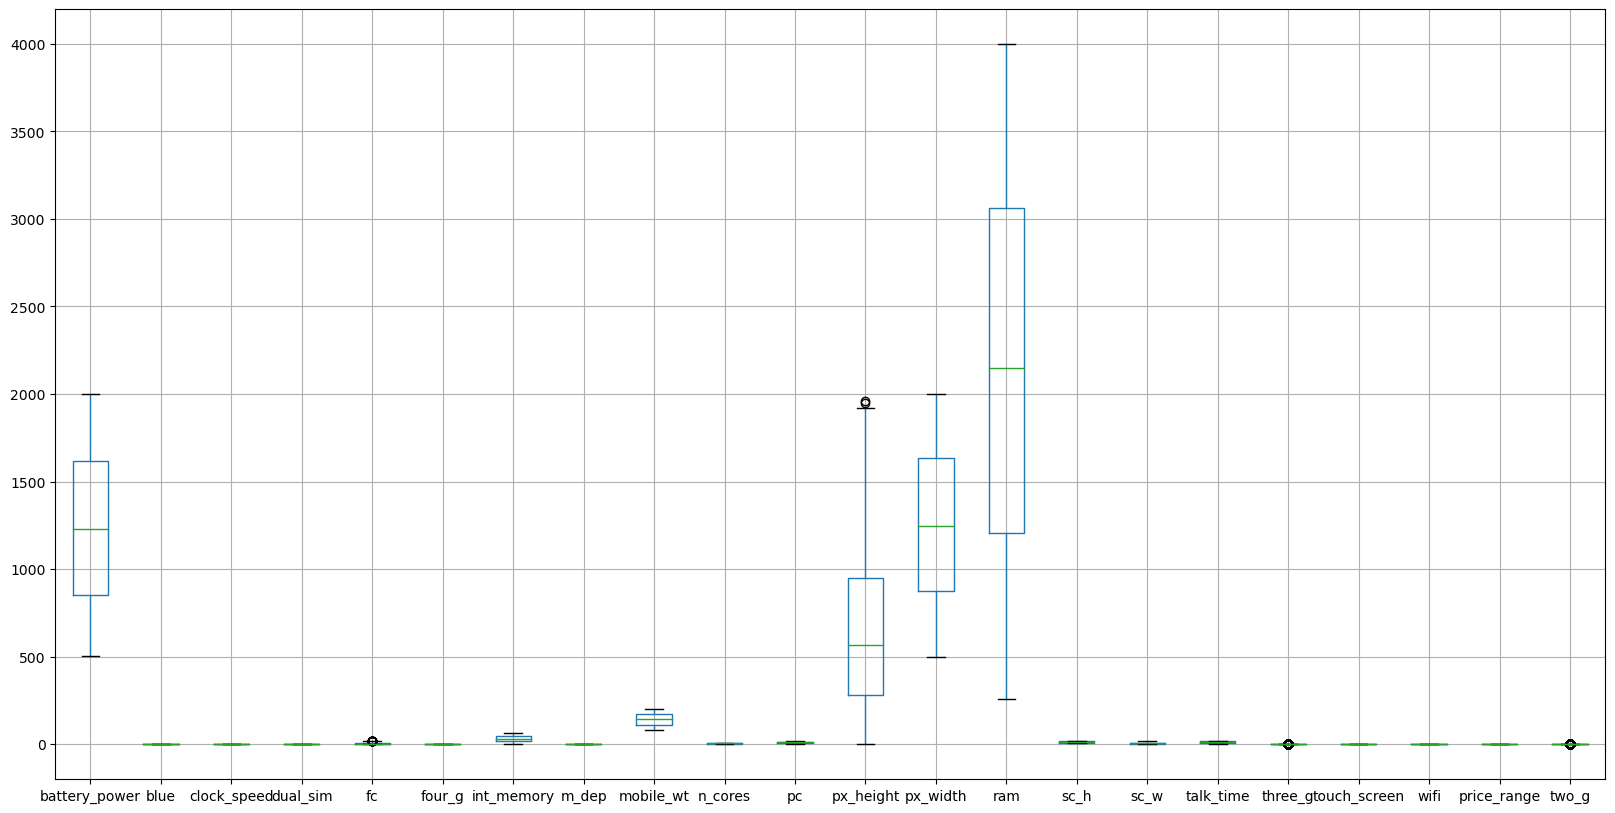

In [52]:
plt.figure(figsize=(20,10))
mob.boxplot()
plt.show()

In [40]:
mob.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1851.0,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.7,2.80,2.90,2.90,2.90,3.00,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,11.0,13.00,14.00,15.00,16.00,16.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,57.0,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,0.9,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,189.0,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.0,8.00,8.00,8.00,8.00,8.00,8.0


In [41]:
mob['two_g']=(mob['four_g']==0) & (mob['three_g']==0)

In [42]:
mob['two_g']

0        True
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: two_g, Length: 2000, dtype: bool

In [43]:
mob['two_g']=mob['two_g'].map({True: 1,
                               False: 0})

In [44]:
mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,two_g
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,0


In [45]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [46]:
mob[mob['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,two_g
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,748,1482,18,0,2,1,0,0,1,0
24,503,0,1.2,1,5,1,8,0.4,111,3,...,1245,2583,11,0,12,1,0,0,1,0
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,1919,3845,7,0,12,1,1,0,3,0
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,714,1878,15,0,4,1,1,0,1,0
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1832,2059,5,0,15,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,1805,2782,7,0,17,1,0,0,2,0
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,1603,3746,5,0,5,1,1,0,3,0
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,509,1817,10,0,6,0,1,0,0,1
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,745,1503,10,0,13,0,0,0,0,1


### Model Development

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes

In [48]:
y=mob['price_range']
x=mob.drop(columns='price_range')

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state=0)

mn=MinMaxScaler()
mn_fit=mn.fit(x_train)
x_train_mn=mn_fit.transform(x_train)
x_test_mn=mn_fit.transform(x_test)

x_train_mn=pd.DataFrame(x_train_mn, columns=x_train.columns)
x_test_mn=pd.DataFrame(x_test_mn, columns=x_test.columns)

In [50]:
mm=MultinomialNB()

mm.fit(x_train_mn,y_train)

print('Train Accuracy : ', mm.score(x_train_mn,y_train))
print('Test Accuracy : ', mm.score(x_test_mn,y_test))

Train Accuracy :  0.63125
Test Accuracy :  0.585
